In [3]:
!pip install gymnasium[classic-control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 31.4 MB/s eta 0:00:0000:0100:01


Episode 100, Average Reward (last 100): 20.91
Episode 200, Average Reward (last 100): 31.21
Episode 300, Average Reward (last 100): 42.68
Episode 400, Average Reward (last 100): 51.89
Episode 500, Average Reward (last 100): 57.18


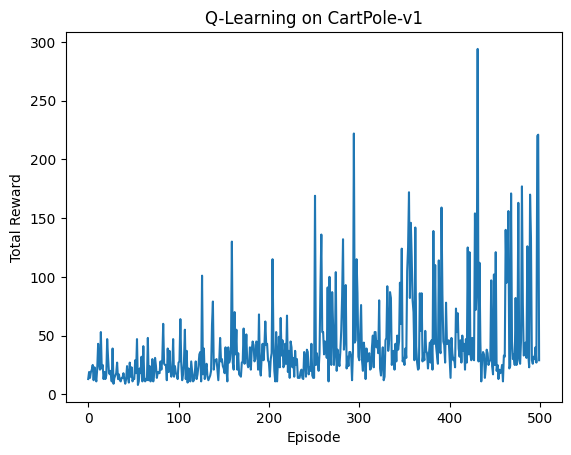

In [4]:
# Reinforcement Learning with Gymnasium: CartPole with Q-Learning

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Discretize the continuous state space
def discretize_state(state, bins):
    upper_bounds = [2.4, 3.0, 0.21, 3.5]
    lower_bounds = [-2.4, -3.0, -0.21, -3.5]
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    new_state = [int(round((bins - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(bins - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

# Parameters
env = gym.make("CartPole-v1", render_mode="rgb_array")
n_bins = 6
state_bins = [n_bins] * len(env.observation_space.high)
n_actions = env.action_space.n
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 1.0    # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
n_episodes = 500

# Initialize Q-table
Q_table = np.zeros(state_bins + [n_actions])

rewards = []

for episode in range(n_episodes):
    obs, _ = env.reset()
    state = discretize_state(obs, n_bins)
    total_reward = 0

    terminated = truncated = False
    while not (terminated or truncated):
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q_table[state])

        next_obs, reward, terminated, truncated, info = env.step(action)
        new_state = discretize_state(next_obs, n_bins)
        Q_old = Q_table[state + (action,)]
        Q_table[state + (action,)] = Q_old + alpha * (
            reward + gamma * np.max(Q_table[new_state]) - Q_old
        )
        state = new_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode+1}, Average Reward (last 100): {np.mean(rewards[-100:]):.2f}")

# Plot training progress
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning on CartPole-v1')
plt.show()

# Visualize agent behavior after training
obs, _ = env.reset()
state = discretize_state(obs, n_bins)
terminated = truncated = False
frames = []

while not (terminated or truncated):
    action = np.argmax(Q_table[state])
    obs, _, terminated, truncated, _ = env.step(action)
    state = discretize_state(obs, n_bins)
    frames.append(env.render())

env.close()

# Display animation
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(6,4))
plt.axis('off')
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)
plt.close()
HTML(anim.to_jshtml())


In [5]:
# !pip install swig
# !pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=495180 sha256=98b4f414fc2913c6d3da9caae1d6ac7b498a804b74dddd8d95e8e9d415b90fa0
  Stored in directory: /srv/hops/anaconda/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


Episode 200: Average Reward (last 200): -127.79
Episode 400: Average Reward (last 200): -130.46
Episode 600: Average Reward (last 200): -146.21
Episode 800: Average Reward (last 200): -148.89
Episode 1000: Average Reward (last 200): -121.80
Episode 1200: Average Reward (last 200): -125.00
Episode 1400: Average Reward (last 200): -132.91
Episode 1600: Average Reward (last 200): -121.35
Episode 1800: Average Reward (last 200): -112.41
Episode 2000: Average Reward (last 200): -95.55
Episode 2200: Average Reward (last 200): -119.32
Episode 2400: Average Reward (last 200): -106.84
Episode 2600: Average Reward (last 200): -116.98
Episode 2800: Average Reward (last 200): -113.21
Episode 3000: Average Reward (last 200): -135.54
Episode 3200: Average Reward (last 200): -119.87
Episode 3400: Average Reward (last 200): -56.42
Episode 3600: Average Reward (last 200): -43.99
Episode 3800: Average Reward (last 200): -71.82
Episode 4000: Average Reward (last 200): -127.88


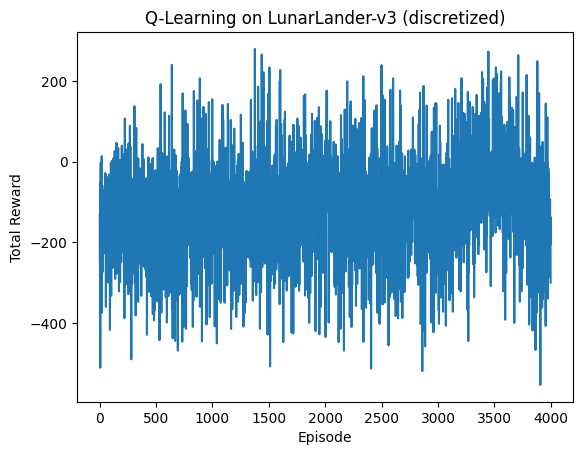

In [6]:
# Install dependencies if needed:
# !pip install gymnasium[box2d] matplotlib numpy

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Discretization helper for LunarLander
def discretize_state(state, bins, bounds):
    ratios = []
    for i in range(len(state)):
        if bounds[i][1] == bounds[i][0]:
            ratios.append(0.5)
        else:
            ratios.append((state[i] - bounds[i][0]) / (bounds[i][1] - bounds[i][0]))
    new_state = [int(round((bins - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(bins - 1, max(0, s)) for s in new_state]
    return tuple(new_state)

# Environment parameters
env = gym.make("LunarLander-v3", render_mode="rgb_array")
obs_low = env.observation_space.low
obs_high = env.observation_space.high
# Override infinite bounds with reasonable values for LunarLander
bounds = [
    [-1.5, 1.5],     # x position
    [-.5, 1.5],      # y position
    [-2.0, 2.0],     # x velocity
    [-2.0, 2.0],     # y velocity
    [-np.pi, np.pi], # angle
    [-3.0, 3.0],     # angular velocity
    [0, 1],          # left leg contact
    [0, 1],          # right leg contact
]

n_bins = 6
state_bins = [n_bins] * len(env.observation_space.low)
n_actions = env.action_space.n
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.05
n_episodes = 4000

Q_table = np.zeros(state_bins + [n_actions])

rewards = []

for episode in range(n_episodes):
    obs, _ = env.reset()
    state = discretize_state(obs, n_bins, bounds)
    total_reward = 0
    terminated = truncated = False
    while not (terminated or truncated):
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q_table[state])

        next_obs, reward, terminated, truncated, _ = env.step(action)
        new_state = discretize_state(next_obs, n_bins, bounds)
        Q_old = Q_table[state + (action,)]
        Q_table[state + (action,)] = Q_old + alpha * (
            reward + gamma * np.max(Q_table[new_state]) - Q_old
        )
        state = new_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    if (episode+1) % 200 == 0:
        avg_last = np.mean(rewards[-200:])
        print(f"Episode {episode+1}: Average Reward (last 200): {avg_last:.2f}")

# Plot training progress
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning on LunarLander-v3 (discretized)')
plt.show()

# Visualize agent after training
obs, _ = env.reset()
state = discretize_state(obs, n_bins, bounds)
terminated = truncated = False
frames = []
while not (terminated or truncated):
    action = np.argmax(Q_table[state])
    obs, _, terminated, truncated, _ = env.step(action)
    state = discretize_state(obs, n_bins, bounds)
    frames.append(env.render())

env.close()

# Animate the result (Jupyter only)
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(6, 6))
plt.axis('off')
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)
plt.close()
HTML(anim.to_jshtml())
